<h1>Thermal invisibility<span class="tocSkip"></span></h1>

<h1>Invisibilité thermique<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Presentation-of-the-problem" data-toc-modified-id="Presentation-of-the-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Presentation of the problem</a></span></li><li><span><a href="#Making-the-problem-dimensionless-and-writing-the-variational-formulation" data-toc-modified-id="Making-the-problem-dimensionless-and-writing-the-variational-formulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Making the problem dimensionless and writing the variational formulation</a></span></li><li><span><a href="#Procedure" data-toc-modified-id="Procedure-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Procedure</a></span></li><li><span><a href="#1D:-Simulation-of-the-stationary-problem" data-toc-modified-id="1D:-Simulation-of-the-stationary-problem-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>1D: Simulation of the stationary problem</a></span><ul class="toc-item"><li><span><a href="#Program-1-:-Resolution-in-dimension-1" data-toc-modified-id="Program-1-:-Resolution-in-dimension-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Program 1 : Resolution in dimension 1</a></span></li><li><span><a href="#Numerical-order-of-the-$\mathbb{P}1$-method." data-toc-modified-id="Numerical-order-of-the-$\mathbb{P}1$-method.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Numerical order of the $\mathbb{P}1$ method.</a></span></li><li><span><a href="#Program-2-:-Resolution-of-the-same-problem-in-dimension-2" data-toc-modified-id="Program-2-:-Resolution-of-the-same-problem-in-dimension-2-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Program 2 : Resolution of the same problem in dimension 2</a></span></li></ul></li><li><span><a href="#2D-:-Computing-an-integrated-flux" data-toc-modified-id="2D-:-Computing-an-integrated-flux-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2D : Computing an integrated flux</a></span></li><li><span><a href="#2D-:-Simulation-of-a-stationary-problem-with-a-constant-conductivity-and-a-non-constant-influx" data-toc-modified-id="2D-:-Simulation-of-a-stationary-problem-with-a-constant-conductivity-and-a-non-constant-influx-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2D : Simulation of a stationary problem with a constant conductivity and a non constant influx</a></span></li><li><span><a href="#2D-:-Simulation-of-the-stationary-problem-in-a-domain-with-a-fixed-hole" data-toc-modified-id="2D-:-Simulation-of-the-stationary-problem-in-a-domain-with-a-fixed-hole-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>2D : Simulation of the stationary problem in a domain with a fixed hole</a></span><ul class="toc-item"><li><span><a href="#Adaptation-of-the-geometry" data-toc-modified-id="Adaptation-of-the-geometry-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Adaptation of the geometry</a></span></li><li><span><a href="#Adaptation-of-the-conductivity" data-toc-modified-id="Adaptation-of-the-conductivity-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Adaptation of the conductivity</a></span></li></ul></li><li><span><a href="#Simulation-of-the-stationary-problem-in-a-domain-with-holes-randomly-scattered" data-toc-modified-id="Simulation-of-the-stationary-problem-in-a-domain-with-holes-randomly-scattered-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Simulation of the stationary problem in a domain with holes randomly scattered</a></span></li><li><span><a href="#Bibliography" data-toc-modified-id="Bibliography-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bibliography</a></span><ul class="toc-item"><li><span><a href="#FEniCS" data-toc-modified-id="FEniCS-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>FEniCS</a></span></li><li><span><a href="#Markdown" data-toc-modified-id="Markdown-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Markdown</a></span></li></ul></li></ul></div>

**Preliminary remarks** The theoretical questions are denoted **Q** and the code questions **P**.

Answer done by **Chensheng Luo**. The **Solution** is my solution and  the **Correction** is the element given by teacher. **Solution-correction** means my solution is right.    

Important predefined $\LaTeX$ formulas are here:
$\newcommand{\pder}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\laplace}{\triangle}
\newcommand{\scalaire}{\cdot}
\newcommand{\der}[2]{\frac{d #1}{d #2}}
\newcommand{\cst}{\mathbf{constant}}
$

# Presentation of the problem

![caption](images/domaine1.png)

We are interested in the heat equation in a rectangle $\Omega=ABCD$ with mixed boundary conditions and no source term:


\begin{equation}\label{eq1:evol}
 \tag{P} \begin{cases}
   \rho c_{p} \partial_t \theta-div(\kappa\ grad(\theta))=0\mbox{ in  }\Omega,\\
(IC) \quad \theta(0,\cdot)=\theta_{0},\\(BC)
\begin{cases}
\kappa \partial_{n}\theta=0 \qquad \mbox{ on }[AB]\\
 \theta=\theta_{0}\qquad \mbox{ on }[BC]\\
\partial_{n}\theta=0 \qquad \mbox{ on }[CD]\\
\kappa\partial_{n}\theta=\psi\qquad \mbox{ on }[DA],\\
\end{cases}
  \end{cases}
\end{equation}


where the numerical values are


\begin{equation*}
\begin{cases}
X=d(A,B)=d(C,D)=10^{-2}\,m\\
Y=d(B,C)=d(D,A)=20\,m\\
\rho=4000\,kg.m^{-3}\\
c_{p}=1000\,J.kg^{-1}.K^{-1}\\
\theta^{0}=278\,K\\
\theta_{0}\mbox{ a function with average }275\,K\\
\psi=
\psi_{0}=100 \, W.m^{-2}\\
\end{cases}
\end{equation*}

and $\kappa:(x,y)\mapsto diag(\kappa_x(x,y),\kappa_y(x,y))$, with $\kappa_x$ and $\kappa_y$ two given functions. Denote $\kappa_n$ the diffusivity on the boundary by analogy with the notation of the normal derivative (you should complete the figure with the exterior normal and $\kappa_n$ on the boundary).

Besides, the evolution equation allows to describe a transient regime to a stationary state that solves

\begin{equation}\tag{Pinf}
  \begin{cases}
    -div(\kappa\ grad(\theta))=0\mbox{ in  }\Omega,\\
(CL)  \end{cases}
\end{equation}

The goal of this tutorial is to compute numerically the temperature on the border $[DA]$
and the heat flux on $[BC]$ to understand how to validate
the numerical simulations with respect to the exact solutions in dimension 1, then to compute efficiently the temperature in a domain with a hole in it.

At first, we will validate the model in the case of a one-dimensional diffusion in $x$,  assuming that $\psi$ is a constant function equal to $\psi_{0}$.

**Q.1** Substantiate this claim, in the case where $\psi$ and $\theta_{0}$ are constants: why can we consider that the solution $\theta$ does not depend on $y$ ? 

**Solution**    

Invariant by y

**Correction**  
***If $\theta_{0}$ and $\psi$ are independant of $y$, is $\theta(x,y)$ independant of y?***   
We want to prove that $\frac{\partial \theta}{\partial y}=0$. let $z=\frac{\partial \theta}{\partial y}=0$, what equation does z satisfy?   
the boundary equation of $z$:   
- On AD:$\kappa\pder{z}{n}=-\kappa\pder{}{x}\pder{\theta}{y}=-\kappa\pder{}{y}\pder{\theta}{x}=\kappa\pder{}{y}\psi=0$
- On BC: $z=0$ because $\pder{\theta}{n}=0$
- On AB and CD: $z=0$  

Let us consider
$E(t)=\frac{1}{2}\int_{\Omega}\rho c_{p} z(t,)^{2}$  
$\der{}{t}E(t)=\frac{1}{2}\int_{\Omega}\rho c_{p} z\der{}{t}z(t,)$  
Let's consider the PDE to replace $\der{}{t}z(t,)$ by $\laplace z(t,)$ so $ one $ and $\der{}{t}E(t)=\frac{1}{2}\int_{\Omega}\rho c_{p} z\laplace z(t,)$  
 = - $\int_{\Omega} k \nabla z(t,) \scalaire \nabla z(t,)$+ $\int_{ \partial \Omega} k z(t,) \nabla z(t,)\scalaire n$  
$=-\int_{\Omega} k ||\nabla z(t,)||^{2}\leq = 0$   
So the energy of system is proven to be decreasing.
As $E(0)=\frac{1}{2}\int_{\Omega}\rho c_{p} z\laplace z(0,)=0$
Thus for any t, $E(t)\leq 0$   
Since $E(t)\geq 0$, we have $E(t)=0$   
thus $z(t,)=0$   
thus $\theta$ is independant of $y$

**Q.2** Rewrite Problem (P) in one space dimension ($x$). We will denote it (P1).

**Solution-correction**   
The ensemble of equation is
\begin{equation}
\tag{P1}
\begin{cases}
    \rho c_{p} \partial_t \theta-\pder{}{x}(\kappa_{x}\pder{\theta}{x})=0\mbox{ in  }\Omega,\\
(IC) \quad \theta(0,\cdot)=\theta_{0},
\\(BC)
\begin{cases}
\theta=\theta_{0}\qquad x=X\\
-\kappa_{x}\pder{\theta}{x}=\psi_{0}\qquad x=0,\\
\end{cases}  \end{cases}
\end{equation}



**Q.3** Write the stationary system associated with (P1) and solve it explicitly.We will denote by $\theta^{\infty}$ the solution. 

**Solution-correction**   
The equation is
\begin{equation}
\tag{P1stat}
\begin{cases}
\frac{d }{d x}(\kappa_{x}\frac{d \theta}{d x})=0\mbox{ in  }\Omega,\\
\\(BC)
\begin{cases}
\theta(x=X)=\theta_{0}\\
-\kappa_{x}\frac{d \theta}{d x}(x=0)=\psi_{0}\\
\end{cases}  \end{cases}
\end{equation}
So we have 
$-\kappa_{x}\frac{d \theta}{d x}=\cst$ and as $-\kappa_{x}\frac{d \theta}{d x}(x=0)=\psi_{0}$ so $-\kappa_{x}\frac{d \theta}{d x}=\psi_{0}$   
Then $\theta=-\frac{\psi_{0}}{\kappa_{x}}x+\cst$ , as $\theta(x=X)=\theta_{0}$ we have $\theta(x)=-\frac{\psi_{0}}{\kappa_{x}}(x-X)+\theta_{0}$


#  Making the problem dimensionless and writing the variational formulation

**Q.1** Write (P) in a dimensionless form with respect to an observation time $T_{obs}$, an observation length in $x$, $X_{obs}$, an observation length in $y$, $Y_{obs}$,and the temperature $\theta_{obs}$. 

We then get a dimensionless evolution problem:

\begin{equation}\label{eq1:evol_adim}
\tag{Padim}\begin{cases}
\partial_{tˆ^{*}}\theta^{*}-\partial_x(\kappa_{x}^{*}\partial_{x^{*}}\theta^{*})-\partial(\kappa_{y}^{*}\partial_{y^{*}}\theta^{*})=0\mbox{ dans }\Omega^{*}\\
(CL)^{*}
\begin{cases}
\kappa^*_n\partial_{n^{*}}\theta^{*}=0 \qquad \mbox{ on }[A^{*}B^{*}]\\
\theta^{*}=\theta_0//\theta_{obs} \qquad \mbox{ on }[B^{*}C^{*}]\\
\kappa^*_n\partial_{n^{*}}\theta=0 \qquad \mbox{ on }[C^{*}D^{*}]\\
\kappa^*_n\partial_{n^{*}}\theta^{*}=\psi^{*} \qquad \mbox{ on }[D^{*}A^{*}],\\
\end{cases}
\end{cases}
\end{equation}

where the starred quantities are dimensionless and $\kappa_{x}^{*}$, $\kappa_{y}^{*}$ and $\kappa_n^{*}$ are the thermal diffusivity constants in each direction $x$, $y$ and normal.

**Solution** 
It's easy to proof this equation.

To simplify the notations, we omit from now on ${}^{*}$ and ${}_{obs}$. We assume that $\psi\in L^2([DA])$. We will now consider that $	heta_0$ is a constant function equal to $	heta_{obs}$

**Q.2** Write the stationary problem associated with (Padim). It will be denoted (Padiminf).

**Solution**   
We have 

\begin{equation}\label{eq1:evol_adim_inf}
\begin{cases}
-\partial_{x}(\kappa_{x}\partial_{x}}\theta)-\partial(\kappa_{y}\partial_{y}\theta)=0\mbox{ dans }\Omega\\
(CL)
\begin{cases}
\kappa_n\partial_{n}\theta=0 \qquad \mbox{ on }[AB]\\
\theta=\theta_0 \qquad \mbox{ on }[BC]\\
\kappa_n\partial_{n}\theta=0 \qquad \mbox{ on }[CD]\\
\kappa_n\partial_{n}\theta=\psi\qquad \mbox{ on }[DA],\\
\end{cases}
\end{cases}
\end{equation}


**Q.3** Write the variational formulation of (Padiminf). Is the solution unique ?

**Solution** 
$a(\theta,\phi)=\int_{\Omega}\kappa \nabla \theta \nabla \phi $

#  Procedure

We want to approach the solution of a problem of partial differential equations
which are known to be well posed through analysis, using a
finite element method. 

"To approximate" can mean several things:
we want to visualize, determine the numerical order, etc. 

The procedure is the following (the steps are numbered Ci for step i of the code): 
- C0: we load the necessary modules;
- C1: we define the constants;
- C2: we start from a geometry by defining the edges by parametric curves: the outer edges being traversed **in the trigonometric direction** and the inner edges **in the clockwise direction** ;
- C3: a mesh is produced;
- C4: we define the space in which the approximate solution is to be found;
- C5: we take into account the conditions at the edge;
- C6: we define the variational formulation;
- C7: we ask the module to solve the system;
- C8: the solution is exploited.

In the following, programs are provided. We will analyze them precisely with respect to
the steps described above. 


#  1D: Simulation of the stationary problem

We detail in the first part of this section a first program that solves an approximate problem in dimension 1, then the goal is for you to write a resolution code.

## Program 1 : Resolution in dimension 1

<p style="color:red;">     C0 : Loading the modules </p>

In [2]:
from dolfin import *

In [3]:
from fenics import *
import matplotlib.pyplot as plt

<p style="color:red;"> C1 : Defining the constants </p>

We fix the constants, the flux from the left $\psi$ and the precision $tol$.

In [4]:
kappaadim=1
psiadim=1
tol = 1E-14

<p style="color:red;"> C2 : Defining the geometry </p>  

It is a segment of dimensionless length 1.

In [5]:
X=1

<p style="color:red;"> C3: Constructing the mesh </p>

Plotting a UnitIntervalmesh1


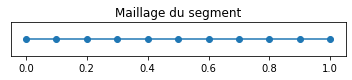

In [6]:
nx1 = 10

mesh1 = UnitIntervalMesh(nx1)

print("Plotting a UnitIntervalmesh1")
plt.figure(1)
plot(mesh1, title="Maillage du segment")
print(mesh1)

<p style="color:red;"> C4: Defining the space Hh in which the numerical solution will be searched </p>

In [6]:
Hh1 = FunctionSpace(mesh1, 'P', 1)

<p style="color:red;"> C5: Taking into account the boundary conditions </p>

The Dirichlet boundary conditions must be specified thanks to the FEniCS control DirichletBC. 
As was seen during the lecture, the Neumann boundary conditions impose the definision of a specific measure on the concerned bart of the boundary. So the different parts of the boundary need to be defined as objects.

In [38]:
# Definition of the specific boundaries, of the Dirichlet condition 
# and of the measure needed to define l1 (non homogeneous Neumann on the left edge)

def RightEdge1(x, on_boundary):
    return on_boundary and (abs(x[0] - 1) < tol) 
    # It should be x[0]=1 but there are some approximations

bcD1 = DirichletBC(Hh1, Constant(2.0), RightEdge1)

class LeftEdge1(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 0) < tol)

bcN1 = LeftEdge1()

boundaries1 = MeshFunction("size_t", mesh1, mesh1.topology().dim()-1, 0)

bcN1.mark(boundaries1,0) # we give the label 0 to the edge x=0 in boundaries1

ds1 = Measure("ds", domain=mesh1, subdomain_data=boundaries1) 

<p style="color:red;"> C6: Coding the variational formulation </p>

In [8]:
u1 = TrialFunction(Hh1)
v1 = TestFunction(Hh1)
l1 = psiadim*v1*ds1(0) #psiadim*v1(0) since ds1(0) is the measure ds1 at x=0 (label 0)
a1 = kappaadim*dot(grad(u1), grad(v1))*dx

<p style="color:red;"> C7: Solving the variational approximation (assembling the rigidity matrix and solving the linear system) </p>

In [9]:
u1 = Function(Hh1)
solve(a1 == l1, u1, bcD1)

Calling FFC just-in-time (JIT) compiler, this may take some time.


<p style="color:red;"> C8: Plotting the solution </p>

Text(0.5, 0, 'x')

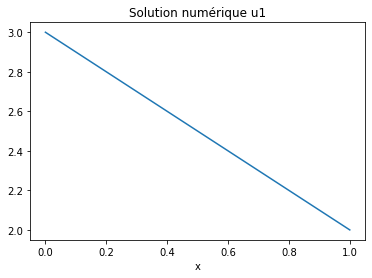

In [10]:
plt.figure(2)
plot(u1,title='Solution numérique u1')
plt.xlabel('x')

**Q.1** Which quantity are we looking at? 

**Solution** 
$\theta$


**Q.2** What problem was solved?

**Solution** 

One can obtain the stiffness matrix using the command *assemble*, that gives the stiffness matrix on all the nodes of the mesh **regardless the boundary conditions**. Careful, to take the Dirichlet boundary conditions into account, on needs to apply it by using the command *boundary_conditions.apply*. 

In [11]:
A1=assemble(a1)
b1=assemble(l1)
print(A1.array())
print(b1.get_local())
bcD1.apply(A1,b1)
print(A1.array())
print(b1.get_local())
coordinates =  mesh1.coordinates()
print(coordinates)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
[[ 10. -10.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-10.  20. -10.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. -10.  20. -10.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -10.  20. -10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. -10.  20. -10.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -10.  20. -10.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -10.  20. -10.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. -10.  20. -10.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -10.  20. -10.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. -10.  20. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. -10.  10.]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

## Numerical order of the $\mathbb{P}1$ method. 

**Q.1** How can we validate numerically the variational approximation, knowing the result of  Q.6 of Part 1 ?

**Solution** 

**P.1** Plot the difference between the solution of the approximate problem and the function thetainf = Expression("2-x[0]", degree=2). 

FEniCS keywords: *Expression*, *project*

In [42]:
# %load P_4_2_1.py


SyntaxError: invalid syntax (<ipython-input-42-5b6c3a20e955>, line 2)

**P.2** Compute the decimal logarithme of the $L^2$ and $H^1$ norm of the error.

FEniCS keywords: *norm*

In [13]:
# %load P_4_2_2.py


**Q.2** Explain this result.

**Solution** 

*Remark* Generally, it is safer to consider the relative error norm(u-thetainf,'H1')/norm(thetainf,'H1'). Here, since norm(thetainf,'H1') is of order 1, it is not worth it.

**P.3** We assume until the end of this section that the source  $S$ is not zero. Assume only in this question that $S$ is uniform, equal to 1 over the whole domain. The exact solution is then $\theta_{ex}:x\mapsto \theta^\infty(x) + (1-x^2)/2$. Code the resolution by the method $\mathbb{P}1$, as a function error_p1 taking as input the number of cells nx as giving as output the H1 norm of the error.

FEniCS keywords: *SpatialCoordinate*, *conditional* (UFL language)

In [14]:
# %load P_4_2_3.py


**P.4** Compute the errors for nx = 8, 16, 32, 64, 128, 256, 512 and 1024. Plot the results taking the decimal logarithm of nx as abscissae.

In [15]:
# %load P_4_2_4.py


**P.5** Give an estimate of the numerical order of the method for this problem.

In [16]:
# %load P_4_2_5.py


**P.6** Modify the code of P.3 to include the sources & exact solutions $S:x\mapsto -\pi\sin(\pi x)$ & $\theta_{ex}:x\mapsto  1-\sin(\pi x)/\pi$  and $S:x\mapsto 8 H(x-1/2)$ & $\theta_{ex}:x\mapsto  -x+3-1_{x>1/2}(2x-1)^2$. Conclude.

**Solution** 

## Program 2 : Resolution of the same problem in dimension 2

We go back to the initial problem (Padiminf), with no source. We now define the full geometry of the initial domain in space dimension 2.

We give the code in dimension 2.

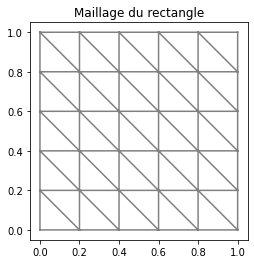

In [17]:
#C0
#from dolfin import *
#from __future__ import print_function
#from fenics import *
#import matplotlib.pyplot as plt

#C1
#kappaadim=1
#psiadim=1
#tol = 1E-14

#C2
#X=1
Y=1

#C3
nx2=5
ny2=5 

mesh2 = RectangleMesh(Point(0.0, 0.0), Point(X, Y), nx2, ny2, diagonal="left") 

plt.figure(1)
plot(mesh2, title="Maillage du rectangle")

#C4
Hh2 = FunctionSpace(mesh2, 'P', 1)

#C5

def RightEdge2(x, on_boundary):
    return on_boundary and (abs(x[0] - 1) < tol) 
    
reD2 = DirichletBC(Hh2, Constant(1.0), RightEdge2)

class LeftEdge2(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 0) < tol)
    
leN2 = LeftEdge2()

boundaries2 = MeshFunction("size_t", mesh2, mesh2.topology().dim()-1, 0)

leN2.mark(boundaries2, 1)

ds2 = Measure("ds", domain=mesh2, subdomain_data=boundaries2)

**P.1** Write the variational formulation of Problem (Padiminf) (step C6) and plot the solution.

In [18]:
# %load P_4_3_1.py


**P.2** Solve the variational approximation (step C7).

In [19]:
# %load P_4_3_2.py


**P.3** Plot the solution (step C8).

In [20]:
# %load P_4_3_3.py


**Q.1** How can you act on the mesh to convince yourself that the solution does not depend on $y$?

**Solution** 

**P.4** How can you implement the $\mathbb{P}2$ method?

**Solution** 

**P.5** Does the solution appear correct visually (you can plot the gradient of $u$)?

FEniCS keywords: *grad*

In [21]:
# %load P_4_3_5.py


# 2D : Computing an integrated flux

The integrated flux on an edge is the integral on this edge of the normal derivative of the temperature.

**Q.1** What is the value of the integrated flux at $x=0$ ? 

**Solution** 

**Q.2** What is the value of the integrated flux at $x=X$ ? 

**Solution** 

**P.1** Write a code that computes the integrated flux on the segment [DA], called influx, and integrated flux on the segment [BC], called outflux. Give as a result the absolute value of the difference.  

FEniCS keywords: *assemble*, *mark*

In [22]:
# %load P_5_1.py


**Q.3** Conclude.

**Solution** 


**Remark** We need to define the right edge *RightEdge* as a class to be able to label it as a subdomain and integrate over this edge.

#  2D : Simulation of a stationary problem with a constant conductivity and a non constant influx

Let the flux be $\psi:y\mapsto \psi_{adim}y$.

**P.1** Insert $\psi$ in code 2. Plot the mesh and the soltution as subfigures.

matplotlib keywords : *subplot*, *colorbar* 

In [23]:
# %load P_6_1.py


**P.2** Estimeate the numerical order of the  $\mathbb{P}1$ and $\mathbb{P}2$ methods for this problem. Since the closed form of the solution is not known, choose large integers nx4 and ny4, e. g. 200, and compare the solutions computed for smaller nx and nyto the solution obtained for the fine mesh mesh4. 

FEniCS keywords: *linregress*

In [24]:
# %load P_6_2.py


**P.3** Give the integrated fluxes at $x=0$ and $x=X$. Was the result predictible?

In [25]:
# %load P_6_3.py


**Solution** 

**Q.3** Conclure.

**Solution** 

#  2D : Simulation of the stationary problem in a domain with a fixed hole

![caption](images/domaine2.png)

## Adaptation of the geometry

At first we consider that there is a circular **insulated** hole of radius $r$ at the center of the domain $\Omega'$. The conditions on the boundary of the hole are thus homogeneous Neumann conditions.

In order to compare the results on mesh that have cells of approximately the same size, we fix the size of the domain, the position and the size of the hole, as well as the number of cells on an edge and the order of the method.

In [26]:
xc=X/2
yc=Y/2
r=0.1

nx5=15
ny5=15
ordre = 1

**P.1** Define the new domain and mesh it.

FEniCS keywords: *Rectangle(Point(.,.),Point(.,.))*, *Circle(Point(.,.),.)*, *generate_mesh*

In [27]:
# %load P_7_1_1.py


**P.2** Solve the problem on the new domain.

In [28]:
# %load P_7_1_2.py


**P.3** Compare the influxes ant outfluxes obtained with the $\mathbb{P}1$ method and the $\mathbb{P}2$ method and comment the result.

In [29]:
# %load P_7_1_3.py


## Adaptation of the conductivity

Consider now the whole domain $\Omega$ with no hole and a variable conductivity ${\kappa_{var}:(x,y)\mapsto (\kappa-10^{-8})\mathbf{1}_{\{(x,y)\in\Omega \,:\, (x-X/2)^{2}+(y-Y/2)^{2}>r^{2}\}}}+10^{-8}$.

**P.1** Code the second approach.

FEniCS keywords: *SpatialCoordinate*, *conditional*

In [30]:
# %load P_7_2_1.py


**P.2**  Compute the difference between the influxes and outfluxes computed with these two approaches. 

*Remark*  The difference between the influx and the outflux obtained with the variable conductivity method is more stable wrt a variation of the radius of the hole than the method consisting in changing of geometry, which requires remeshing and increases the condition number of the matrix.

In [31]:
# %load P_7_2_2.py


**P.3** Create another mesh with a slightly larger hole and interpolate the solutions u5 et u6 on this domain. Plot the difference. Conclude.

In [32]:
# %load P_7_2_3.py


**Q.1** Why do we fix $\kappa=10^{-8}$ in the hole? Try $0$ instead.

**Solution**

# Simulation of the stationary problem in a domain with holes randomly scattered

We now want to solve numerically the problem in a domain with holes. Their number is random and follows a Poisson law with parameter 5. Their centers are random and follow a normal law with mean the center of the domain and variance 0.1. Their radii are random and follow an exponential law with parameter 5.

In [33]:
param_poisson = 5
scale_exp = 1/5
var_c = 0.1
nx8 = 100
ny8 = 100
ordre = 2

**P.1** Draw up the number of holes, their radii and their centers.

numpy keywords : *poisson*, *exponential*, *normal*

In [34]:
# %load P_8_1.py


**P.2** Define an adapted conductivity and plot it.

In [35]:
# %load P_8_2.py


**P.3** Solve the problem numerically.

In [36]:
# %load P_8_3.py


**P.4** Is the term "thermal invisibility" still relevant ?

In [37]:
# %load P_8_4.py


# Bibliography

## FEniCS

Documentation : https://fenicsproject.org/documentation/

Getting started : http://www-users.math.umn.edu/~arnold/8445/fenics-getting-started.pdf

UFL : https://fenics.readthedocs.io/projects/ufl/en/latest/manual/form_language.html



## Markdown

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

